<a href="https://colab.research.google.com/github/hwang-sudang/kkoApplemusic/blob/simple_tags/0705Tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt


In [2]:
# Îß• Ïö©
# ÎÇòÎàîÍ≥†Îîï ÏÑ§Ïπò

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Í∑∏ÎûòÌîÑÏóê retina display Ï†ÅÏö©

%config InlineBackend.figure_format = 'retina'

# Colab Ïùò ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï

plt.rc('font', family='NanumBarunGothic') 

# Îü∞ÌÉÄÏûÑ Îã§Ïãú ÏãúÏûë ÌïÑÏàò

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Mounted at /content/gdrive/


In [2]:
import os
os.chdir("/content/gdrive/My Drive/melon-playlist-continuation-master")
print(os.getcwd())
!ls

/content/gdrive/My Drive/melon-playlist-continuation-master
 0705Tags.ipynb		 PlaylistEmbedding.ipynb   split_data.py
 arena_util.py		 __pycache__		   test01.rtf
 evaluate.py		 README.md		   test.json
 genre_gn_all.json	 requirements.txt	   train.json
 genre_most_popular.py	 results.json		   uniq_tags.csv
 LICENSE		 song_meta.json		   uniq_tags.gsheet
 most_popular.py	'sparse matrix.ipynb'	   uniq_tags.xml
 NOTICE.md		 split_data.ipynb	   val.json


In [3]:
from datetime import timedelta, datetime
import glob
from itertools import chain
import json
import os
import re

import numpy as np
import pandas as pd

# Ïû•Î•¥ ÌÉêÍµ¨

In [4]:
genre_gn_all = pd.read_json('genre_gn_all.json', typ = 'series')
genre_gn_all = pd.DataFrame(genre_gn_all, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})
genre_gn_all.head(10)

gnr_code gnr_name
0   GN0100      Î∞úÎùºÎìú
1   GN0101   ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
2   GN0102      '80
3   GN0103      '90
4   GN0104      '00
5   GN0105     '10-
6   GN0200       ÎåÑÏä§
7   GN0201   ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
8   GN0202      '80
9   GN0203      '90

In [5]:
# Ïû•Î•¥ÏΩîÎìú Îí∑ÏûêÎ¶¨ Îëê ÏûêÎ¶¨Í∞Ä 00Ïù∏ ÏΩîÎìúÎ•º ÌïÑÌÑ∞ÎßÅ
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] == '00']
gnr_code.head(30)

gnr_code    gnr_name
0     GN0100         Î∞úÎùºÎìú
6     GN0200          ÎåÑÏä§
12    GN0300        Îû©/ÌûôÌï©
18    GN0400    R&B/Soul
22    GN0500        Ïù∏ÎîîÏùåÏïÖ
32    GN0600        Î°ù/Î©îÌÉà
39    GN0700        ÏÑ±Ïù∏Í∞ÄÏöî
50    GN0800      Ìè¨ÌÅ¨/Î∏îÎ£®Ïä§
56    GN0900         POP
65    GN1000        Î°ù/Î©îÌÉà
80    GN1100      ÏùºÎ†âÌä∏Î°úÎãàÏπ¥
90    GN1200        Îû©/ÌûôÌï©
100   GN1300    R&B/Soul
109   GN1400  Ìè¨ÌÅ¨/Î∏îÎ£®Ïä§/Ïª®Ìä∏Î¶¨
117   GN1500         OST
128   GN1600         ÌÅ¥ÎûòÏãù
144   GN1700          Ïû¨Ï¶à
155   GN1800        Îâ¥ÏóêÏù¥ÏßÄ
163   GN1900       J-POP
176   GN2000        ÏõîÎìúÎÆ§ÏßÅ
187   GN2100         CCM
198   GN2200      Ïñ¥Î¶∞Ïù¥/ÌÉúÍµê
215   GN2300        Ï¢ÖÍµêÏùåÏïÖ
218   GN2400          Íµ≠ÏïÖ
225   GN2500         ÏïÑÏù¥Îèå
232   GN2600      ÏùºÎ†âÌä∏Î°úÎãàÏπ¥
237   GN2700         EDM
242   GN2800       ÎÆ§ÏßÅÌÖåÎùºÌîº
249   GN2900         ÎÆ§ÏßÄÏª¨
253   GN3000       ÌÅ¨Î¶¨Ïä§ÎßàÏä§

In [6]:
## ÏÉÅÏÑ∏ Ïû•Î•¥ ÏΩîÎìú 224Í∞ú
# Ïû•Î•¥ÏΩîÎìú Îí∑ÏûêÎ¶¨ Îëê ÏûêÎ¶¨Í∞Ä 00Ïù¥ ÏïÑÎãå ÏΩîÎìúÎ•º ÌïÑÌÑ∞ÎßÅ
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] != '00']
dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace=True)
dtl_gnr_code

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


dtl_gnr_code dtl_gnr_name
1         GN0101       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
2         GN0102          '80
3         GN0103          '90
4         GN0104          '00
5         GN0105         '10-
..           ...          ...
247       GN2805         ÏàôÎ©¥Ïú†ÎèÑ
248       GN2806         Î∞òÎ†§ÎèôÎ¨º
250       GN2901       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
251       GN2902        Íµ≠ÎÇ¥ÎÆ§ÏßÄÏª¨
252       GN2903        Íµ≠Ïô∏ÎÆ§ÏßÄÏª¨

[224 rows x 2 columns]

In [7]:
# ÏÉÅÏÑ∏Ïû•Î•¥ ÏΩîÎìú Ï∂îÏ∂ú
dtl_gnr_code = dtl_gnr_code.assign(join_code = dtl_gnr_code['dtl_gnr_code'].str[0:4])
dtl_gnr_code

dtl_gnr_code dtl_gnr_name join_code
1         GN0101       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥      GN01
2         GN0102          '80      GN01
3         GN0103          '90      GN01
4         GN0104          '00      GN01
5         GN0105         '10-      GN01
..           ...          ...       ...
247       GN2805         ÏàôÎ©¥Ïú†ÎèÑ      GN28
248       GN2806         Î∞òÎ†§ÎèôÎ¨º      GN28
250       GN2901       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥      GN29
251       GN2902        Íµ≠ÎÇ¥ÎÆ§ÏßÄÏª¨      GN29
252       GN2903        Íµ≠Ïô∏ÎÆ§ÏßÄÏª¨      GN29

[224 rows x 3 columns]

Ïû•Î•¥ÏΩîÎìú Ìä∏Î¶¨

In [8]:
# ÏïûÏûêÎ¶¨ ÎÑ§ ÏûêÎ¶¨ Í≥µÌÜµÏΩîÎìú Ï∂îÏ∂ú like GN01
gnr_code = gnr_code.assign(join_code=gnr_code['gnr_code'].str[0:4]) 
# join_codeÎùºÎäî ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ•º assignÏùÑ Ïù¥Ïö©Ìï¥ ÎßåÎì§ÏóàÎã§.
gnr_code

gnr_code    gnr_name join_code
0     GN0100         Î∞úÎùºÎìú      GN01
6     GN0200          ÎåÑÏä§      GN02
12    GN0300        Îû©/ÌûôÌï©      GN03
18    GN0400    R&B/Soul      GN04
22    GN0500        Ïù∏ÎîîÏùåÏïÖ      GN05
32    GN0600        Î°ù/Î©îÌÉà      GN06
39    GN0700        ÏÑ±Ïù∏Í∞ÄÏöî      GN07
50    GN0800      Ìè¨ÌÅ¨/Î∏îÎ£®Ïä§      GN08
56    GN0900         POP      GN09
65    GN1000        Î°ù/Î©îÌÉà      GN10
80    GN1100      ÏùºÎ†âÌä∏Î°úÎãàÏπ¥      GN11
90    GN1200        Îû©/ÌûôÌï©      GN12
100   GN1300    R&B/Soul      GN13
109   GN1400  Ìè¨ÌÅ¨/Î∏îÎ£®Ïä§/Ïª®Ìä∏Î¶¨      GN14
117   GN1500         OST      GN15
128   GN1600         ÌÅ¥ÎûòÏãù      GN16
144   GN1700          Ïû¨Ï¶à      GN17
155   GN1800        Îâ¥ÏóêÏù¥ÏßÄ      GN18
163   GN1900       J-POP      GN19
176   GN2000        ÏõîÎìúÎÆ§ÏßÅ      GN20
187   GN2100         CCM      GN21
198   GN2200      Ïñ¥Î¶∞Ïù¥/ÌÉúÍµê      GN22
215   GN2300        Ï¢ÖÍµêÏùåÏïÖ      GN23
218   GN2400          Íµ≠ÏïÖ      GN24
225   GN2500         ÏïÑÏù¥Îèå      GN25
232   GN2600      ÏùºÎ†âÌä∏Î°úÎãàÏπ¥      GN26
237   GN2700         EDM      GN27
242   GN2800       ÎÆ§ÏßÅÌÖåÎùºÌîº      GN28
249   GN2900         ÎÆ§ÏßÄÏª¨      GN29
253   GN3000       ÌÅ¨Î¶¨Ïä§ÎßàÏä§      GN30

In [9]:
# merge : ÎåÄÎ∂ÑÎ•ò Ïû•Î•¥ÏôÄ ÏÉÅÏÑ∏Î∂ÑÎ•ò Ïû•Î•¥Î•º Ìï®Íªò Î¨∂ÎäîÎã§.
gnr_code_tree=pd.merge(gnr_code, dtl_gnr_code, how="left", on='join_code') #join_codeÎ°ú Î¨∂Í≥†
gnr_code_tree[['gnr_code','gnr_name','dtl_gnr_code','dtl_gnr_name']]

gnr_code gnr_name dtl_gnr_code dtl_gnr_name
0     GN0100      Î∞úÎùºÎìú       GN0101       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
1     GN0100      Î∞úÎùºÎìú       GN0102          '80
2     GN0100      Î∞úÎùºÎìú       GN0103          '90
3     GN0100      Î∞úÎùºÎìú       GN0104          '00
4     GN0100      Î∞úÎùºÎìú       GN0105         '10-
..       ...      ...          ...          ...
220   GN2800    ÎÆ§ÏßÅÌÖåÎùºÌîº       GN2806         Î∞òÎ†§ÎèôÎ¨º
221   GN2900      ÎÆ§ÏßÄÏª¨       GN2901       ÏÑ∏Î∂ÄÏû•Î•¥Ï†ÑÏ≤¥
222   GN2900      ÎÆ§ÏßÄÏª¨       GN2902        Íµ≠ÎÇ¥ÎÆ§ÏßÄÏª¨
223   GN2900      ÎÆ§ÏßÄÏª¨       GN2903        Íµ≠Ïô∏ÎÆ§ÏßÄÏª¨
224   GN3000    ÌÅ¨Î¶¨Ïä§ÎßàÏä§          NaN          NaN

[225 rows x 4 columns]

In [10]:
# ÎÖÑÎèÑÎ≥Ñ Ï∞æÏïÑÎ≥¥Í∏∞
gnr_code_tree[gnr_code_tree['dtl_gnr_name'] == "'80"]

gnr_code gnr_name join_code dtl_gnr_code dtl_gnr_name
1    GN0100      Î∞úÎùºÎìú      GN01       GN0102          '80
6    GN0200       ÎåÑÏä§      GN02       GN0202          '80
29   GN0600     Î°ù/Î©îÌÉà      GN06       GN0603          '80
66   GN1000     Î°ù/Î©îÌÉà      GN10       GN1011          '80
75   GN1100   ÏùºÎ†âÌä∏Î°úÎãàÏπ¥      GN11       GN1106          '80
84   GN1200     Îû©/ÌûôÌï©      GN12       GN1206          '80

In [11]:
gnr_code_tree[gnr_code_tree['dtl_gnr_name'] == "'10-"]  #ÏïÑÎûò Ïû•Î•¥Îì§Ïù¥ ÏãúÎåÄÎ≥Ñ~~ Ïù¥Îü∞ Í≥°Îì§Ïóê Îì§Ïñ¥Í∞à Ïàò ÏûàÎäî Ïû•Î•¥Îì§

gnr_code  gnr_name join_code dtl_gnr_code dtl_gnr_name
4    GN0100       Î∞úÎùºÎìú      GN01       GN0105         '10-
9    GN0200        ÎåÑÏä§      GN02       GN0205         '10-
26   GN0500      Ïù∏ÎîîÏùåÏïÖ      GN05       GN0509         '10-
32   GN0600      Î°ù/Î©îÌÉà      GN06       GN0606         '10-
47   GN0800    Ìè¨ÌÅ¨/Î∏îÎ£®Ïä§      GN08       GN0805         '10-
55   GN0900       POP      GN09       GN0908         '10-
69   GN1000      Î°ù/Î©îÌÉà      GN10       GN1014         '10-
78   GN1100    ÏùºÎ†âÌä∏Î°úÎãàÏπ¥      GN11       GN1109         '10-
87   GN1200      Îû©/ÌûôÌï©      GN12       GN1209         '10-
95   GN1300  R&B/Soul      GN13       GN1308         '10-

# ÌÉúÍ∑∏ ÌÉêÍµ¨

In [12]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.
song_meta = pd.read_json('song_meta.json', typ = 'frame')
song_meta

song_gn_dtl_gnr_basket  issue_date  ... artist_name_basket      id
0                    [GN0901]    20140512  ...  [Various Artists]       0
1            [GN1601, GN1606]    20080421  ...   [Murray Perahia]       1
2                    [GN0901]    20180518  ...    [Peter Gabriel]       2
3            [GN1102, GN1101]    20151016  ...           [Matoma]       3
4            [GN1802, GN1801]    20110824  ...         [Jude Law]       4
...                       ...         ...  ...                ...     ...
707984               [GN2001]    19991219  ...        [Fela Kuti]  707984
707985               [GN0901]    19860000  ...     [Cyndi Lauper]  707985
707986       [GN0105, GN0101]    20160120  ...              [Ïú§Ï¢ÖÏã†]  707986
707987       [GN1807, GN1801]    20131217  ...     [Nature Piano]  707987
707988       [GN0601, GN0604]    19980000  ...              [ÍπÄÍ≤ΩÌò∏]  707988

[707989 rows x 9 columns]

In [13]:
train = pd.read_json('train.json', typ = 'frame')
train

tags  ...                updt_date
0                                                     [ÎùΩ]  ...  2013-12-19 18:36:19.000
1                                                [Ï∂îÏñµ, ÌöåÏÉÅ]  ...  2014-12-02 16:19:42.000
2                                               [ÍπåÌéò, ÏûîÏûîÌïú]  ...  2017-08-28 07:09:34.000
3       [Ïó∞Îßê, ÎààÏò§ÎäîÎÇ†, Ï∫êÎü¥, Î∂ÑÏúÑÍ∏∞, Îî∞ÎìØÌïú, ÌÅ¨Î¶¨Ïä§ÎßàÏä§Ï∫êÎü¥, Í≤®Ïö∏ÎÖ∏Îûò, ÌÅ¨Î¶¨Ïä§ÎßàÏä§,...  ...  2019-12-05 15:15:18.000
4                                                    [ÎåÑÏä§]  ...  2011-10-25 13:54:56.000
...                                                   ...  ...                      ...
115066               [Î°ùÎ©îÌÉà, Î∞¥ÎìúÏÇ¨Ïö¥Îìú, Î°ù, ÎùΩÎ©îÌÉà, Î©îÌÉà, ÎùΩ, extreme]  ...  2020-04-17 04:31:11.000
115067                                               [ÏùºÎ†â]  ...  2015-12-24 17:23:19.000
115068             [Îã¥Ïãú, Í∞ÄÏ°±, ÎààÎ¨º, Í∑∏Î¶¨ÏõÄ, Ï£ºÏù∏Í≥µ, ÎÇòÏùò_Ïù¥ÏïºÍ∏∞, ÏÇ¨Îûë, ÏπúÍµ¨]  ...  2019-08-16 20:59:22.000
115069                      [ÏûîÏûîÌïú, Î≤ÑÏä§, Ìá¥Í∑ºÎ≤ÑÏä§, Pop, ÌíçÍ≤Ω, Ìá¥Í∑ºÍ∏∏]  ...  2019-10-25 23:40:42.000
115070                             [ÎÖ∏ÎûòÏ∂îÏ≤ú, ÌåùÏÜ°Ï∂îÏ≤ú, ÌåùÏÜ°, ÌåùÏÜ°Î™®Ïùå]  ...  2020-04-18 20:35:06.000

[115071 rows x 6 columns]

In [14]:
# import from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
# Ï¥àÍ∏∞ ÏÑ§Ï†ï Ìè∞Ìä∏ ÏÑ§Ï†ïÌïòÍ∏∞
import matplotlib.font_manager
import matplotlib.font_manager as fm

[f.name for f in fm.fontManager.ttflist if f.name.startswith("N")]

['NanumBarunGothic',
 'NanumSquareRound',
 'NanumGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumMyeongjo']

In [16]:
# ÌïÑÏàòÏ†ÅÏúºÎ°ú unnest ÌïÑÏöî
# ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ ÏïÑÏù¥Îîî(id)ÏôÄ Îß§ÌïëÎêú ÌÉúÍ∑∏(tags) Ï∂îÏ∂ú
plylst_tag_map = train[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest Í∞ùÏ≤¥ Ï†úÍ±∞
del plylst_tag_map_unnest

In [17]:
plylst_tag_map

id  tags
0        61281     ÎùΩ
1        10532    Ï∂îÏñµ
2        10532    ÌöåÏÉÅ
3        76951    ÍπåÌéò
4        76951   ÏûîÏûîÌïú
...        ...   ...
476326  131982   Ìá¥Í∑ºÍ∏∏
476327  100389  ÎÖ∏ÎûòÏ∂îÏ≤ú
476328  100389  ÌåùÏÜ°Ï∂îÏ≤ú
476329  100389    ÌåùÏÜ°
476330  100389  ÌåùÏÜ°Î™®Ïùå

[476331 rows x 2 columns]

## ÌÉúÍ∑∏ Î¨∂Ïùå Î™®Ïùå

Î®ºÏ†Ä ÌÉúÍ∑∏Î¨∂Ïùå Î™®Ïùå ÎÅºÎ¶¨ ÌïúÎ≤à Î≥¥Í≥†

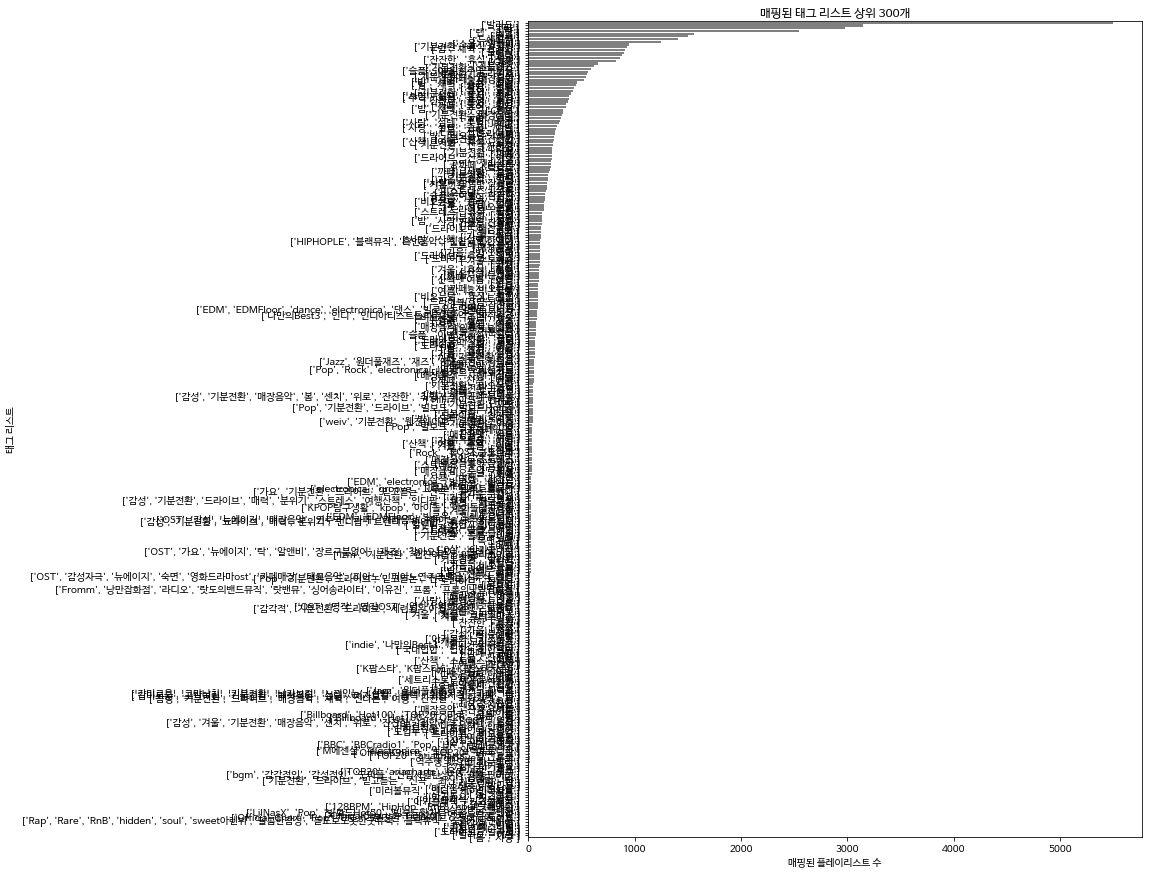

In [18]:
plylst_tag_list_sort = plylst_tag_map.sort_values(by = ['id', 'tags']).groupby('id').tags.apply(list).reset_index(name = 'tag_list')

# 2. ÏßëÍ≥ÑÎ•º ÏúÑÌï¥ 1Î≤à ÌÖåÏù¥Î∏îÏóêÏÑú list ÌÉÄÏûÖÏùÑ Î¨∏ÏûêÏó¥ ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
plylst_tag_list_sort['tag_list'] = plylst_tag_list_sort['tag_list'].astype(str)

# 3. ÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏ Î≥Ñ Îß§ÌïëÎêòÎäî ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïàò ÏßëÍ≥Ñ ÌÖåÏù¥Î∏î ÏÉùÏÑ± : tag_list_plylst_cnt
tag_list_plylst_cnt = plylst_tag_list_sort.groupby('tag_list').id.nunique().reset_index(name = 'plylst_cnt')

# 4. Îß§Ìïë Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ 300Í∞ú ÌïÑÌÑ∞ÎßÅ
tag_list_plylst_cnt = tag_list_plylst_cnt.nlargest(300, 'plylst_cnt')

# 5. plotting
plt.figure(figsize = (11, 15))
plt.rc('font', family='NanumBarunGothic')
tag_list_plylst_cnt_plot = sns.barplot(y = 'tag_list', x = 'plylst_cnt', data = tag_list_plylst_cnt, color = 'grey')
tag_list_plylst_cnt_plot.set_title('Îß§ÌïëÎêú ÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏ ÏÉÅÏúÑ 300Í∞ú')
tag_list_plylst_cnt_plot.set_xlabel('Îß§ÌïëÎêú ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïàò')
tag_list_plylst_cnt_plot.set_ylabel('ÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏')
plt.show()

Ï†ÄÍ∏∞ ÏïàÏóê Îì§Ïñ¥Í∞Ñ ÌÉúÍ∑∏Îì§ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Ïûê by.ÏäπÍ∏∞Ïø§

In [19]:
import re
p = re.compile("\w+")
tags_300 = []
for i in range(len(tag_list_plylst_cnt)):
    tags_300.extend(p.findall(tag_list_plylst_cnt.tag_list.iloc[i]))

set(tags_300)

{'0ÏÇ¥',
 '128BPM',
 '3ÏÇ¥',
 '7ÏÇ¥',
 '8ÏÇ¥',
 'BBC',
 'BBCradio1',
 'Billboard',
 'CCM',
 'EDM',
 'EDMFloor',
 'Fromm',
 'HIPHOPLE',
 'HiFiÍ∞ÄÏù¥Îìú',
 'HipHop',
 'Hot100',
 'JPOP',
 'Jazz',
 'KPOPÌÉêÍµ¨ÏÉùÌôú',
 'KÌåùÏä§ÌÉÄ',
 'KÌåùÏä§ÌÉÄ6',
 'KÌåùÏä§ÌÉÄÏãúÏ¶å6',
 'LilNasX',
 'MÏóêÏÑºÏÖú',
 'OST',
 'OfficialCharts',
 'Official_Chart',
 'Pop',
 'Rap',
 'Rare',
 'RnB',
 'Rock',
 'TOP20',
 'UK',
 'ariacharts',
 'bgm',
 'dance',
 'electronica',
 'groove',
 'hidden',
 'indie',
 'izm',
 'kpop',
 'soul',
 'sweetÏïÑÎ†åÎ∑î',
 'test',
 'weiv',
 'Í∞ÄÏöî',
 'Í∞ÄÏùÑ',
 'Í∞êÍ∞ÅÏ†Å',
 'Í∞êÍ∞ÅÏ†ÅÏù∏',
 'Í∞êÎØ∏Î°úÏö¥',
 'Í∞êÏÑ±',
 'Í∞êÏÑ±ÏûêÍ∑π',
 'Í∞êÏÑ±Ï†ÅÏù∏',
 'Í∞êÏÑ±ÌûôÌï©',
 'Í≤®Ïö∏',
 'Í≥†ÎßâÎÇ®Ïπú',
 'Í≥†ÎßâÏó¨Ïπú',
 'Í≥µÏó∞',
 'Íµ≠ÎÇ¥ÌûôÌï©',
 'ÍµøÌîºÌîå',
 'Í∑∏Î£®Î∏å',
 'Í∏àÏöîÏùº',
 'Í∏∞Î∂ÑÏ†ÑÌôò',
 'ÍπåÌéò',
 'ÎÇòÎßåÏùòBest3',
 'ÎÇ®ÏûêÎ≥¥Ïª¨',
 'ÎÇ≠ÎßåÏû°ÌôîÏ†ê',
 'ÎÖ∏Îûò',
 'Îâ¥ÏóêÏù¥ÏßÄ',
 'ÎäêÎÇåÏûàÎäî',
 'Îã§Ï§ëÏùåÍ≤©',
 'Îã¨ÏΩ§ÌïúÍ∞êÏÑ±',
 'ÎåÑÏä§',
 'ÎèÑÏûÖÎ∂Ä',
 'ÎìúÎùºÎßà',
 'Îìú

In [20]:
f = open('test01.rtf', 'w')
print(tags_300, file=f) # ÌååÏùº Ï†ÄÏû•ÌïòÍ∏∞
f.close()

### üçäÏïÑÏòà Îå†Ïùº ÌÉúÍ∑∏Îßå 200Í∞ú ÎΩëÏïÑÎ≥ºÍπå? ÌöüÏàòÎûë!

In [ ]:
plylst_tag_map

In [ ]:
# plylst_tag_list_sort = plylst_tag_map.sort_values(by = ['id', 'tags']).groupby('id').tags.apply(list).reset_index(name = 'tag_list')
plylst_tag_list_sort

In [ ]:
tag_list_cnt = plylst_tag_map.groupby('tags').id.nunique().reset_index(name = 'tag_cnt')
tag_list_cnt  # Îã®Ïùº ÌÉúÍ∑∏Îì§Ïù¥ ÏñºÎßàÎÇò ÎßéÏù¥ ÌÉúÍ∑∏ÎêòÏóàÎÇò?

In [ ]:
# 4. Îß§Ìïë Ïàò Í∏∞Ï§Ä ÏÉÅÏúÑ 200Í∞ú ÌïÑÌÑ∞ÎßÅ
tag_list_200 = tag_list_cnt.nlargest(200, 'tag_cnt')

# 5. plotting
plt.figure(figsize = (11, 15))
plt.rc('font', family='NanumBarunGothic')
tag_list_plylst_cnt_plot = sns.barplot(y = 'tags', x = 'tag_cnt', data = tag_list_cnt, color = 'green')
tag_list_plylst_cnt_plot.set_title('Îß§ÌïëÎêú ÌÉúÍ∑∏ ÏÉÅÏúÑ 200Í∞ú')
tag_list_plylst_cnt_plot.set_xlabel('Îß§ÌïëÎêú ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏ Ïàò')
tag_list_plylst_cnt_plot.set_ylabel('ÌÉúÍ∑∏ Î¶¨Ïä§Ìä∏')
plt.show()

In [ ]:
tag_list_300

# Í≤πÏπòÎäî ÌÉúÍ∑∏ Ï†ïÎ¶¨

In [21]:
type(tags_300)

list

In [22]:
tag300_uniq = pd.Series(tags_300).unique()
tag300_uniq

array(['Î∞úÎùºÎìú', 'Ìåù', 'ÎùΩ', 'Îû©', 'ÌûôÌï©', 'ÎåÑÏä§', 'ÏùºÎ†â', 'Îâ¥ÏóêÏù¥ÏßÄ', 'ÏÜåÏö∏', 'ÏïåÏï§ÎπÑ',
       'Í∏∞Î∂ÑÏ†ÑÌôò', 'Ìú¥Ïãù', 'ÌûêÎßÅ', 'Î∞§', 'ÏÉàÎ≤Ω', 'ÏûîÏûîÌïú', 'ÌÅ¥ÎûòÏãù', 'Ïù∏Îîî', 'Ïû¨Ï¶à', 'OST',
       'Ïä§Ìä∏Î†àÏä§', 'Ïä¨Ìîî', 'Ïù¥Î≥Ñ', 'Ï∂îÏñµ', 'ÌöåÏÉÅ', 'ÎìúÎùºÏù¥Î∏å', 'ÏÇ¨Îûë', 'ÏÑ§Î†ò', 'ÍπåÌéò', 'Îß§Ïû•ÏùåÏïÖ',
       'CCM', 'JPOP', 'Î¥Ñ', 'ÎπÑÏò§ÎäîÎÇ†', 'ÏÇ∞Ï±Ö', 'Ïó¨Ìñâ', 'Pop', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≥µÏó∞',
       'ÏÖãÎ¶¨Ïä§Ìä∏', 'Ìä∏Î°úÌä∏', 'Ïö¥Îèô', 'Í≤®Ïö∏', 'ÌÅ¥ÎüΩ', 'ÏõîÎìúÎÆ§ÏßÅ', 'HIPHOPLE', 'Î∏îÎûôÎÆ§ÏßÅ',
       'ÌùëÏù∏ÏùåÏïÖ', 'ÌûôÌï©ÏóòÏù¥', 'Í∞êÏÑ±', 'Í∞ÄÏöî', 'Î°ù', 'EDM', 'EDMFloor', 'dance',
       'electronica', 'ÎπåÎ°úÏö∞', 'ÏùºÎ†âÌä∏Î°úÎãàÏπ¥', 'ÎÇòÎßåÏùòBest3', 'Ïù∏ÎîîÏïÑÌã∞Ïä§Ìä∏Îì§ÏùòÏ∂îÏ≤úÏùåÏïÖ', 'ÌîºÏâ¨ÏäàÏ¶à',
       'Ïó∞Ï£º', 'ÏõîÎìú', 'Jazz', 'ÏõêÎçîÌíÄÏû¨Ï¶à', 'Ïû¨Ï¶àÏ∂îÏ≤ú', 'Ìô©ÎçïÌò∏', 'Rock', 'ÏòÅÍµ≠', 'Ïò§ÌîºÏÖúÏ∞®Ìä∏',
       'ÏãúÎåÄÎ≥ÑÏ∞®Ìä∏', 'Ìï¥Ïô∏Ï∞®Ìä∏', 'ÏÑºÏπò', 'ÏúÑÎ°ú', 'Ï∑®Ìñ•Ï†ÄÍ≤©', 'Ïπ¥Ìéò', 'HiFiÍ∞

- Î∞úÎùºÎìú : Î∞úÎùºÎìú, 
- Ìåù : Pop, Ìåù, ÌåùÏÜ°, Í∞ÄÏöî
- Ïû¨Ï¶à : Ïû¨Ï¶à, Jazz, Ïû¨Ï¶àÏ∂îÏ≤ú, Ìô©ÎçïÌò∏, ÏõêÎçîÌíÄÏû¨Ï¶à, 
- ÌûôÌï© : Hiphop, HipHop, Rap, ÌûôÌï©ÏóòÏù¥, HIPHOPLE, Íµ≠ÎÇ¥ÌûôÌï©, Îû©, ÌûôÌï©,
- ÎùΩ : Rock, ÎùΩ, Î°ù, 
- ÍµøÌîºÌîå : ÏòàÎä•ÌåêÎØ∏ÏÉù, Ïã†ÏûÖÏÇ¨ÏõêÌÉÑÏÉùÍ∏∞, ÍµøÌîºÌîå
- ÏïåÏï§ÎπÑ : ÏïåÏï§ÎπÑ, Ïà®Í≤®ÏßÑÏïåÏï§ÎπÑÏÜ°, RnB, sweetÏïÑÎ†åÎ∑î, soul, ÏÜåÏö∏
- ÌùëÏù∏ÏùåÏïÖ : ÌùëÏù∏ÏùåÏïÖ, Î∏îÎûôÎÆ§ÏßÅ
- Í∑∏Î£®Î∏å : Í∑∏Î£®Î∏å, groove, 
- ÌÅ¥ÎûòÏãù : ÌÅ¥ÎûòÏãù
- Ïù∏Îîî : Ïù∏Îîî, Ïù∏ÎîîÌåù, ÏºÄÏù¥Ïù∏ÎîîÏ∞®Ìä∏, Ïù∏ÎîîÏùåÏïÖ, indie, Ïù∏ÎîîÏïÑÌã∞Ïä§Ìä∏Îì§ÏùòÏ∂îÏ≤úÏùåÏïÖ, ÎØ∏Îü¨Î≥ºÎÆ§ÏßÅ, 
- Ïª®Ìä∏Î¶¨ : Ïª®Ìä∏Î¶¨
- Ï∫êÎ°§ : ÌÅ¨Î¶¨Ïä§ÎßàÏä§, Ï∫êÎ°§ 
- CCM : CCM
- JPOP : JPOP
- EDM : EDM, EDMFloor, ÌÅ¥ÎüΩ
- ÎåÑÏä§ : ÎåÑÏä§, dance
- ÏùºÎ†â : electronica, ÏùºÎ†âÌä∏Î°úÎãàÏπ¥, ÏùºÎ†â,
- ÌÇ§Ï¶àÎèôÏöî : ÌÇ§Ï¶àÎèôÏöî, 3ÏÇ¥, 7ÏÇ¥
- kpop : KPOPÌÉêÍµ¨ÏÉùÌôú, kpop, ÏïÑÏù¥Îèå, ÏïÑÏù¥ÎèåÌÉêÍµ¨ÏÉùÌôú
- ÌîÑÎ°¨ : Fromm, ÌîÑÎ°¨, ÌîÑÎ°¨ÏùòÎÇ≠ÎßåÏû°ÌôîÏ†ê, ÎÇ≠ÎßåÏû°ÌôîÏ†ê, 
- OST : OST, Î™ÖÏûëOST, ÏòÅÌôîOST, Î™ÖÏûë, ÏòÅÌôî, ÏòÅÌôîÎìúÎùºÎßàost, ÎìúÎùºÎßà, 
- Ïù¥Ï¶ò :izm, ÏõπÏßÑÏù¥Ï¶ò
- weiv : weiv, ÏõπÏßÑÏõ®Ïù¥Î∏å, Ïõ®Ïù¥Î∏å 
- KÌåùÏä§ÌÉÄ : KÌåùÏä§ÌÉÄ, KÌåùÏä§ÌÉÄ6, KÌåùÏä§ÌÉÄÏãúÏ¶å6, 
- ÎûèÎèÑÏùòÎ∞¥ÎìúÎÆ§ÏßÅ : ÎûèÎèÑÏùòÎ∞¥ÎìúÎÆ§ÏßÅ, ÎûèÎ∞¥ÎÆ§, 
- ÏòÅÍµ≠ : ÏòÅÍµ≠, OfficalCharts, Ïò§ÌîºÏÖúÏ∞®Ìä∏, UK, Official_Chart, LilNasX
- ÎπåÎ≥¥Îìú : ÎπåÎ≥¥Îìú, ÎπåÎ≥¥ÎìúHot50, ÎπåÎ≥¥ÎìúÌï´Ï∞®Ìä∏, Billboard, ÎØ∏Íµ≠, Hot100,
- Ìú¥Ïãù : Ìú¥Ïãù, ÌûêÎßÅ, Ìú¥Ïãù_ÌûêÎßÅ, 
- ÍπåÌéò : Ïπ¥Ìéò, Îß§Ïû•ÏùåÏïÖ, ÍπåÌéò, Ïπ¥ÌéòÎß§Ïû•, Îü∞Îçò, Ïπ¥ÌéòÏùåÏïÖ, 
- BBC : BBC, BBCradio1,
- ÌîºÏïÑÎÖ∏ : ÌîºÏïÑÎÖ∏, ÌîºÏïÑÎÖ∏Ïó∞Ï£ºÍ≥°Î™®Ïùå
- Í∞êÏÑ± : Í∞êÏÑ±, Í∞êÏÑ±ÌûôÌï©, Í∞êÏÑ±ÏûêÍ∑π, Í∞êÏÑ±Ï†ÅÏù∏
- Í∞êÍ∞Å : Í∞êÍ∞Å, Í∞êÍ∞ÅÏ†Å, Í∞êÍ∞ÅÏ†ÅÏù∏, ÎäêÎÇåÏûàÎäî 
- Ïä¨Ìîî : 'Ïù¥Î≥Ñ', 'Ï∂îÏñµ', 'ÌöåÏÉÅ', 'Ïä¨Ìîî'
- Î†àÏñ¥Ìïú : Î†àÏñ¥Ìïú, Rare, hidden
- Ïó¨Ìñâ : Ïó¨Ìñâ, Ïó¨ÌñâÏÇ∞Ï±Ö, ÏòÅÌôîÎìúÎùºÎßàost
- Ìú¥Ïãù : ÌûêÎßÅ, Ìú¥Ïãù 
- ÏõîÎìúÎÆ§ÏßÅ : ÏõîÎìúÎÆ§ÏßÅ, ÏõîÎìú
- Ïã†Í≥° : 'Ïã†Í≥°', 'ÏµúÏã†', 'Ìä∏Î†åÎîî', 'Ìä∏Î†åÎìú'
- Ïñ¥Î¶∞Ïù¥ : ÏïÑÍ∏∞ÎèôÌôî, ÌÇ§Ï¶àÎèôÌôî, ÌÇ§Ï¶àÌÅ¥ÎûòÏãù, ÌÉúÍµêÏùåÏïÖ, 0ÏÇ¥, 3ÏÇ¥, 7ÏÇ¥, 8ÏÇ¥, ÏïÑÍ∏∞ÎèôÏöî, ÌÇ§Ï¶àÎèôÏöî, Ï†ïÏÑúÎ∞úÎã¨, 
- Ïó∞Ï£º : Ïó∞Ï£º, Ïó∞Ï£ºÍ≥°, 
- ÏÖãÎ¶¨Ïä§Ìä∏ : ÏÖãÎ¶¨Ïä§Ìä∏, ÏÑ∏Ìä∏Î¶¨Ïä§Ìä∏
- ÎπÑ : ÎπÑ, ÎπÑÏò§ÎäîÎÇ†
- Ïö¥Îèô : 128BPM, Ïö¥Îèô


# Ïó≠ÏúºÎ°ú 2Í∞ú Ïù¥ÏÉÅÏùò Í¥ÄÎ†® ÌÉúÍ∑∏Î•º Îã¨ÏïÑÏïº ÌïòÎäî ÏïÑÏù¥Îì§
- Ïà®Í≤®ÏßÑÏïåÏï§ÎπÑÏÜ° : Rare, hidden, R&B
- ÌÇ§Ï¶àÌÅ¥ÎûòÏãù : ÌÉúÍµêÏùåÏïÖ, ÌÅ¥ÎûòÏãù
- ÏïÑÎ¨¥Î°úÎÇòÎØ∏Ïóê : ÏÑ∏Ìä∏Î¶¨Ïä§Ìä∏




Î¨∏Îìù ÌÉúÍ∑∏ Î∂ÑÎ•òÎ•º ÌïòÎã§Í∞Ä, ÏÇ¨ÎûåÏù¥ ÏÜêÏúºÎ°ú ÌïòÎäî Í≤å Í≥ºÏó∞ Ï†ïÌôïÌï† ÏßÄ Î™®Î•¥Í≤†Îã§Îäî ÏÉùÍ∞ÅÏùÑ Ìï®.. Í∑∏Îü¨ÎÇò Ïö∞ÏÑ† Ïù¥Î†áÍ≤å Í∞ÄÎ≥¥Í≥† ÌÉúÍ∑∏Í∞Ñ Ïú†ÏÇ¨ÎèÑÎ•º Ï∞æÏùÑ Î∞©Î≤ïÏùÑ Íµ¨ÌïòÏûê.



## ÎÖ∏Í∞ÄÎã§Î°ú ÎåÄÌëú ÌÉúÍ∑∏ÎÅºÎ¶¨ Î¨∂ÏùÄ 3Ï∞®Ïõê Î¶¨Ïä§Ìä∏ÎßåÎì¶
#### Ïôú? : Ï∞®ÏõêÏù¥ Îã¨ÎùºÏÑú... Îß§Ìä∏Î¶≠Ïä§ÎÇò Îç∞Ïù¥ÌÑ∞ Î≤†Ïù¥Ïä§Îäî Î¨¥Î¶¨ÎùºÍ≥† ÏÉùÍ∞ÅÌï¥ÏÑú ÏùºÎã®ÏùÄ 3Ï∞®ÏõêÏúºÎ°ú Í∞ÅÍ∞Å ÌÅ¨Í∏∞Í∞Ä Îã§Î•∏ Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì§ÏóàÎã§.
#### Í≤∞Íµ≠ Í≥µÌè¨Ïùò Ìè¨Î¨∏Ïù∏Í∞ÄÏöî?

In [29]:
# ÏúÑÏùò ÎåÄÌëúÌÉúÍ∑∏ÎåÄÎ°ú ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì§Ïûê
# csv, txt ÌååÏùºÎ°ú Î≥ÄÌôòÌï† Ïàò ÏóÜÏñ¥ÏÑú ÎÖ∏Í∞ÄÎã§Ìï®
ballad = ["Î∞úÎùºÎìú"]
pop = ['Ìåù','Pop', 'ÌåùÏÜ°', 'Í∞ÄÏöî']
jazz = ['Ïû¨Ï¶à', 'Jazz', 'Ïû¨Ï¶àÏ∂îÏ≤ú', 'Ìô©ÎçïÌò∏', 'ÏõêÎçîÌíÄÏû¨Ï¶à']
hiphop = ["ÌûôÌï©",'Hiphop', 'HipHop', 'Rap', 'ÌûôÌï©ÏóòÏù¥', 'HIPHOPLE', 'Íµ≠ÎÇ¥ÌûôÌï©', 'Îû©']
rock = ["ÎùΩ", "Rock", "Î°ù"]
gppl = ["ÍµøÌîºÌîå", "ÏòàÎä•ÌåêÎØ∏ÏÉù", "Ïã†ÏûÖÏÇ¨ÏõêÌÉÑÏÉùÍ∏∞"]
rnb = ['ÏïåÏï§ÎπÑ', 'Ïà®Í≤®ÏßÑÏïåÏï§ÎπÑÏÜ°', 'RnB', 'sweetÏïÑÎ†åÎ∑î', 'soul', 'ÏÜåÏö∏']
blkmusic=['ÌùëÏù∏ÏùåÏïÖ', 'Î∏îÎûôÎÆ§ÏßÅ']
groove=['Í∑∏Î£®Î∏å',"groove"]
classic = ["ÌÅ¥ÎûòÏãù", 'classic']
indie=['Ïù∏Îîî',"indie", 'Ïù∏ÎîîÌåù', 'ÏºÄÏù¥Ïù∏ÎîîÏ∞®Ìä∏', 'Ïù∏ÎîîÏùåÏïÖ', 'Ïù∏ÎîîÏïÑÌã∞Ïä§Ìä∏Îì§ÏùòÏ∂îÏ≤úÏùåÏïÖ', 'ÎØ∏Îü¨Î≥ºÎÆ§ÏßÅ']
country = ['Ïª®Ìä∏Î¶¨']
carol = ['Ï∫êÎ°§', 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§']
EDM = ['EDM', 'EDMFloor', 'ÌÅ¥ÎüΩ']
dance = ['ÎåÑÏä§', 'dance']
elec = ["electronica", "ÏùºÎ†âÌä∏Î°úÎãàÏπ¥", "ÏùºÎ†â"]
kids = ["ÌÇ§Ï¶àÎèôÏöî", "3ÏÇ¥", "7ÏÇ¥"]
kpop = ["kpop", "KPOPÌÉêÍµ¨ÏÉùÌôú", "ÏïÑÏù¥Îèå", "ÏïÑÏù¥ÎèåÌÉêÍµ¨ÏÉùÌôú"]
fromm = ['Fromm', 'ÌîÑÎ°¨', 'ÌîÑÎ°¨ÏùòÎÇ≠ÎßåÏû°ÌôîÏ†ê', 'ÎÇ≠ÎßåÏû°ÌôîÏ†ê']
ost = ["OST", "Î™ÖÏûëOST", "ÏòÅÌôîOST", "Î™ÖÏûë", "ÏòÅÌôî", "ÏòÅÌôîÎìúÎùºÎßàost", "ÎìúÎùºÎßà"]
izm = ["izm","ÏõπÏßÑÏù¥Ï¶ò"]
weiv = ['weiv', 'ÏõπÏßÑÏõ®Ïù¥Î∏å', 'Ïõ®Ïù¥Î∏å']
kpstar = ['KÌåùÏä§ÌÉÄ', 'KÌåùÏä§ÌÉÄ6', 'KÌåùÏä§ÌÉÄÏãúÏ¶å6']
ratdo = ['ÎûèÎèÑÏùòÎ∞¥ÎìúÎÆ§ÏßÅ', 'ÎûèÎ∞¥ÎÆ§']
uk=['ÏòÅÍµ≠', 'OfficalCharts', 'Ïò§ÌîºÏÖúÏ∞®Ìä∏', 'UK', 'Official_Chart', 'LilNasX']
billboards=['ÎπåÎ≥¥Îìú', 'ÎπåÎ≥¥ÎìúHot50', 'ÎπåÎ≥¥ÎìúÌï´Ï∞®Ìä∏', 'Billboard', 'ÎØ∏Íµ≠', 'Hot100']
rest = ['Ìú¥Ïãù', 'ÌûêÎßÅ', 'Ìú¥Ïãù_ÌûêÎßÅ']
cafe = ['Ïπ¥Ìéò', 'Îß§Ïû•ÏùåÏïÖ', 'ÍπåÌéò', 'Ïπ¥ÌéòÎß§Ïû•', 'Îü∞Îçò', 'Ïπ¥ÌéòÏùåÏïÖ']
bbc = ['BBC', 'BBCradio1']
piano = ['ÌîºÏïÑÎÖ∏', 'ÌîºÏïÑÎÖ∏Ïó∞Ï£ºÍ≥°Î™®ÏûÑ']
mood=['Í∞êÏÑ±', 'Í∞êÏÑ±ÌûôÌï©', 'Í∞êÏÑ±ÏûêÍ∑π', 'Í∞êÏÑ±Ï†ÅÏù∏', 'Îã¨ÏΩ§ÌïúÍ∞êÏÑ±']
feel=['Í∞êÍ∞Å', 'Í∞êÍ∞ÅÏ†Å', 'Í∞êÍ∞ÅÏ†ÅÏù∏', 'ÎäêÎÇåÏûàÎäî']
sad=['Ïù¥Î≥Ñ', 'Ï∂îÏñµ', 'ÌöåÏÉÅ', 'Ïä¨Ìîî']
rare=['Î†àÏñ¥Ìïú', 'Rare', 'hidden']
travel=['Ïó¨Ìñâ', 'Ïó¨ÌñâÏÇ∞Ï±Ö','ÏòÅÌôîÎìúÎùºÎßàost']
healing=['ÌûêÎßÅ', 'Ìú¥Ïãù']
world=['ÏõîÎìúÎÆ§ÏßÅ', 'ÏõîÎìú']
new_=['Ïã†Í≥°', 'ÏµúÏã†', 'Ìä∏Î†åÎîî', 'Ìä∏Î†åÎìú']
kids=['ÏïÑÍ∏∞ÎèôÌôî', 'ÌÇ§Ï¶àÎèôÌôî', 'ÌÇ§Ï¶àÌÅ¥ÎûòÏãù', 'ÌÉúÍµêÏùåÏïÖ', '0ÏÇ¥', '3ÏÇ¥', '7ÏÇ¥', '8ÏÇ¥', 'ÏïÑÍ∏∞ÎèôÏöî', 'ÌÇ§Ï¶àÎèôÏöî', 'Ï†ïÏÑúÎ∞úÎã¨'
'Ïó∞Ï£º', 'Ïó∞Ï£ºÍ≥°']
setlist= ['ÏÖãÎ¶¨Ïä§Ìä∏', 'ÏÑ∏Ìä∏Î¶¨Ïä§Ìä∏']
rain=['ÎπÑ', 'ÎπÑÏò§ÎäîÎÇ†']
exercise=['128BPM', 'Ïö¥Îèô']


main_tags=[ballad,pop,jazz,hiphop, rock, gppl, rnb, blkmusic, groove, classic,
           indie, country, carol, EDM, dance, elec, kids, fromm,  ost, izm, weiv, kpstar,
           carol, EDM, dance, elec, kids, fromm,  ost, izm, weiv, kpstar,
           ratdo, uk, billboards, rest, cafe, bbc, piano, mood, feel, sad, rare, travel, healing, 
           world, new_, kids, setlist, rain, exercise]

main_tags2 = ['Îâ¥ÏóêÏù¥ÏßÄ','Í∏∞Î∂ÑÏ†ÑÌôò', 'Ìú¥Ïãù', 'ÌûêÎßÅ', 'Î∞§', 'ÏÉàÎ≤Ω', 'ÏûîÏûîÌïú','Ïä§Ìä∏Î†àÏä§', 'ÎìúÎùºÏù¥Î∏å', 'ÏÇ¨Îûë', 'ÏÑ§Î†ò',
              'Î¥Ñ', 'ÏÇ∞Ï±Ö', 'Ïó¨Ìñâ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≥µÏó∞','Ìä∏Î°úÌä∏', 'Ïö¥Îèô', 'Í≤®Ïö∏', 'ÎπåÎ°úÏö∞', 'ÎÇòÎßåÏùòBest3',
              'ÌîºÏâ¨ÏäàÏ¶à', 'ÏãúÎåÄÎ≥ÑÏ∞®Ìä∏', 'Ìï¥Ïô∏Ï∞®Ìä∏', 'ÏÑºÏπò', 'ÏúÑÎ°ú', 'Ï∑®Ìñ•Ï†ÄÍ≤©', 'HiFiÍ∞ÄÏù¥Îìú', 'ÌïúÏßÄÌõà','Ïã†ÎÇòÎäî', 'ÏúÑÌÅ¥Î¶¨Ï¥àÏù¥Ïä§',
              'Ïä§Ïø®Ïò§Î∏åÎ°ù', 'Í∏àÏöîÏùº', 'ÎØøÍ≥†Îì£Îäî',  'Îß§Î†•','Î∂ÑÏúÑÍ∏∞', 'ÌûàÎì†Ìä∏Îûô', 'Ïó∞Ï£ºÍ≥°', 'Ìé∏ÏïàÌïú',  'ÎÖ∏Îûò','Î≥µÎ©¥Í∞ÄÏôï', 'Ïû•Î•¥Íµ¨Î∂ÑÏóÜÏù¥', 'Ï∞æÏïÑÏò§ÎäîDJ', 
              'ÏàôÎ©¥', 'Î™©ÏöîÏùº', 'ÎùºÎîîÏò§', 'Ïã±Ïñ¥ÏÜ°ÎùºÏù¥ÌÑ∞','Ïù¥Ïú†ÏßÑ','ÌïúÎèôÏú§','ÏÑ∏Î†®Îêú', 'ÏïÑÏπ®',  'test', 'Î©îÌÉà', 'Îã§Ï§ëÏùåÍ≤©',
              'ÏïÑÎ¨¥Î°úÎÇòÎØ∏Ïóê', 'Í∞êÎØ∏Î°úÏö¥', 'Í≥†ÎßâÎÇ®Ïπú', 'ÎÇ®ÏûêÎ≥¥Ïª¨', 'ÏùåÏÉâ', 'Í≥†ÎßâÏó¨Ïπú', 'Îß§Î†•Ï†ÅÏù∏','Ïó¨ÏûêÎ≥¥Ïª¨',  'TOP20', 'ÎèÑÏûÖÎ∂Ä',
              'MÏóêÏÑºÏÖú', 'ariacharts', 'Ìò∏Ï£º', 'Ïó≠Ï£ºÌñâ_ÌñàÏúºÎ©¥_ÌïòÎäîÎÖ∏Îûò', 'bgm', 'Îì£ÎèÑÎ≥¥ÎèÑÎ™ªÌïúÍµøÎÆ§ÏßÅ', 'ÌéòÏä§Ìã∞Î≤å', 'CCM', 'JPOP']


In [30]:
main_tags

[['Î∞úÎùºÎìú'],
 ['Ìåù', 'Pop', 'ÌåùÏÜ°', 'Í∞ÄÏöî'],
 ['Ïû¨Ï¶à', 'Jazz', 'Ïû¨Ï¶àÏ∂îÏ≤ú', 'Ìô©ÎçïÌò∏', 'ÏõêÎçîÌíÄÏû¨Ï¶à'],
 ['ÌûôÌï©', 'Hiphop', 'HipHop', 'Rap', 'ÌûôÌï©ÏóòÏù¥', 'HIPHOPLE', 'Íµ≠ÎÇ¥ÌûôÌï©', 'Îû©'],
 ['ÎùΩ', 'Rock', 'Î°ù'],
 ['ÍµøÌîºÌîå', 'ÏòàÎä•ÌåêÎØ∏ÏÉù', 'Ïã†ÏûÖÏÇ¨ÏõêÌÉÑÏÉùÍ∏∞'],
 ['ÏïåÏï§ÎπÑ', 'Ïà®Í≤®ÏßÑÏïåÏï§ÎπÑÏÜ°', 'RnB', 'sweetÏïÑÎ†åÎ∑î', 'soul', 'ÏÜåÏö∏'],
 ['ÌùëÏù∏ÏùåÏïÖ', 'Î∏îÎûôÎÆ§ÏßÅ'],
 ['Í∑∏Î£®Î∏å', 'groove'],
 ['ÌÅ¥ÎûòÏãù', 'classic'],
 ['Ïù∏Îîî', 'indie', 'Ïù∏ÎîîÌåù', 'ÏºÄÏù¥Ïù∏ÎîîÏ∞®Ìä∏', 'Ïù∏ÎîîÏùåÏïÖ', 'Ïù∏ÎîîÏïÑÌã∞Ïä§Ìä∏Îì§ÏùòÏ∂îÏ≤úÏùåÏïÖ', 'ÎØ∏Îü¨Î≥ºÎÆ§ÏßÅ'],
 ['Ïª®Ìä∏Î¶¨'],
 ['Ï∫êÎ°§', 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§'],
 ['EDM', 'EDMFloor', 'ÌÅ¥ÎüΩ'],
 ['ÎåÑÏä§', 'dance'],
 ['electronica', 'ÏùºÎ†âÌä∏Î°úÎãàÏπ¥', 'ÏùºÎ†â'],
 ['ÏïÑÍ∏∞ÎèôÌôî',
  'ÌÇ§Ï¶àÎèôÌôî',
  'ÌÇ§Ï¶àÌÅ¥ÎûòÏãù',
  'ÌÉúÍµêÏùåÏïÖ',
  '0ÏÇ¥',
  '3ÏÇ¥',
  '7ÏÇ¥',
  '8ÏÇ¥',
  'ÏïÑÍ∏∞ÎèôÏöî',
  'ÌÇ§Ï¶àÎèôÏöî',
  'Ï†ïÏÑúÎ∞úÎã¨Ïó∞Ï£º',
  'Ïó∞Ï£ºÍ≥°'],
 ['Fromm', 'ÌîÑÎ°¨', 'ÌîÑÎ°¨ÏùòÎÇ≠ÎßåÏû°ÌôîÏ†ê', 'ÎÇ≠Îß

# Î≥∏Í≤©Ï†ÅÏúºÎ°ú ÌîåÎ†àÏù¥Î¶¨Ïä§Ìä∏Ïùò ÌÉúÍ∑∏Î•º Í∞ÑÎã®Ìôî ÏãúÌÇ®Îã§.

In [25]:
print(train.columns) #'tags', 'id', 'plylst_title', 'songs', 'like_cnt', 'updt_date'
train

Index(['tags', 'id', 'plylst_title', 'songs', 'like_cnt', 'updt_date'], dtype='object')


tags  ...                updt_date
0                                                     [ÎùΩ]  ...  2013-12-19 18:36:19.000
1                                                [Ï∂îÏñµ, ÌöåÏÉÅ]  ...  2014-12-02 16:19:42.000
2                                               [ÍπåÌéò, ÏûîÏûîÌïú]  ...  2017-08-28 07:09:34.000
3       [Ïó∞Îßê, ÎààÏò§ÎäîÎÇ†, Ï∫êÎü¥, Î∂ÑÏúÑÍ∏∞, Îî∞ÎìØÌïú, ÌÅ¨Î¶¨Ïä§ÎßàÏä§Ï∫êÎü¥, Í≤®Ïö∏ÎÖ∏Îûò, ÌÅ¨Î¶¨Ïä§ÎßàÏä§,...  ...  2019-12-05 15:15:18.000
4                                                    [ÎåÑÏä§]  ...  2011-10-25 13:54:56.000
...                                                   ...  ...                      ...
115066               [Î°ùÎ©îÌÉà, Î∞¥ÎìúÏÇ¨Ïö¥Îìú, Î°ù, ÎùΩÎ©îÌÉà, Î©îÌÉà, ÎùΩ, extreme]  ...  2020-04-17 04:31:11.000
115067                                               [ÏùºÎ†â]  ...  2015-12-24 17:23:19.000
115068             [Îã¥Ïãú, Í∞ÄÏ°±, ÎààÎ¨º, Í∑∏Î¶¨ÏõÄ, Ï£ºÏù∏Í≥µ, ÎÇòÏùò_Ïù¥ÏïºÍ∏∞, ÏÇ¨Îûë, ÏπúÍµ¨]  ...  2019-08-16 20:59:22.000
115069                      [ÏûîÏûîÌïú, Î≤ÑÏä§, Ìá¥Í∑ºÎ≤ÑÏä§, Pop, ÌíçÍ≤Ω, Ìá¥Í∑ºÍ∏∏]  ...  2019-10-25 23:40:42.000
115070                             [ÎÖ∏ÎûòÏ∂îÏ≤ú, ÌåùÏÜ°Ï∂îÏ≤ú, ÌåùÏÜ°, ÌåùÏÜ°Î™®Ïùå]  ...  2020-04-18 20:35:06.000

[115071 rows x 6 columns]

In [26]:
# 'tags', 'id', 'plylst_title', 'songs', 'like_cnt', 'updt_date'
train_new=train[['tags','id','songs']]
type(train_new['tags'][1]) # Î¶¨Ïä§Ìä∏ Í∞í....


# Ïö∞ÏÑ† ÌÉúÍ∑∏Îì§ÏùÑ Î™®Îëê ÌíÄÏñ¥Ìó§Ï≥êÏÑú... 

list

In [33]:
tags_x=train_new['tags'].values # main tags

'Pop'

# Ïò§Î•ò: ÌÉúÍ∑∏ Í∞ÑÎã®Ìôî ÏãúÌÇ§Í∏∞ - Ï†ïÎßê 2Ï§ë Ìè¨Î¨∏ÎøêÏù∏Í∞Ä?